### Jambo Exploratory Analysis

* Just looking for patterns here.
* Data sourced from current POS system from opening date of the shop. Will try to update it regularly

An overview of the raw data

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from keys import conn_str
from sqlalchemy import create_engine, exc

df = pd.read_sql_table('raw_sales', conn_str)
df.tail()

,index,Outlet,Number,Date,DueDate,SalesType,SalesPerson,Customer,CreatorID,Created,...,Variants.Cost,Variants.UnitQuantity,Variants.Quantity,Variants.Code,Variants.Name,Payments.Note,Payments.Code,Payments.Method,Payments.Amount,Payments.Date
13488,2750,Kayole Branch,21.01.513,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2021-01-25T22:22:41.243,...,104.0,1.0,1.0,None,Velvet 4,None,None,Cash,130.0,2021-01-25T00:00:00
13489,2750,Kayole Branch,21.01.513,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2021-01-25T22:22:41.243,...,17.0,1.0,1.0,None,Cotton Tops,None,None,Cash,130.0,2021-01-25T00:00:00
13490,2751,Kayole Branch,21.01.514,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2021-01-25T22:33:50.673,...,150.0,1.0,1.0,None,pallazo pants 5,None,None,Cash,100.0,2021-01-25T00:00:00
13491,2752,Kayole Branch,21.01.515,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2021-01-26T00:04:36.673,...,150.0,1.0,1.0,None,pallazo pants 5,None,None,Cash,190.0,2021-01-25T00:00:00
13492,2752,Kayole Branch,21.01.515,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,2021-01-26T00:04:36.673,...,104.0,1.0,1.0,None,Velvet 4,None,None,Cash,190.0,2021-01-25T00:00:00


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13493 entries, 0 to 13492
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    13493 non-null  int64  
 1   Outlet                   13493 non-null  object 
 2   Number                   13493 non-null  object 
 3   Date                     13493 non-null  object 
 4   DueDate                  13493 non-null  object 
 5   SalesType                13493 non-null  object 
 6   SalesPerson              0 non-null      object 
 7   Customer                 0 non-null      float64
 8   CreatorID                13493 non-null  object 
 9   Created                  13493 non-null  object 
 10  Discount1                13493 non-null  float64
 11  Discount2                13493 non-null  float64
 12  DiscountAmount           13493 non-null  float64
 13  Gross                    13493 non-null  float64
 14  DiscountTotal         

In [3]:
df.nunique()

index                      2759
Outlet                        1
Number                     9267
Date                        306
DueDate                       1
SalesType                     1
SalesPerson                   0
Customer                      0
CreatorID                     1
Created                    9264
Discount1                     3
Discount2                     3
DiscountAmount               21
Gross                       394
DiscountTotal                73
TaxType                       1
Tax                           1
Surcharge                     1
Sales                       420
SalesNTax                   420
Coupon                        0
Note                         14
InvoiceID                  9267
PointUsed                     1
PointsEarned                 32
Delivery                      2
Void                          1
Customer.Name                51
Customer.Email                0
Customer.Mobile              47
Customer.Code                37
Variants

Converting the 'Created' column to datetime and sorting the entries from oldest to newest.
Will be useful in the future

In [4]:
df['Created'] = pd.to_datetime(df['Created'])
df = df.set_index('Created')

df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['dayOfWeek'] = df.index.weekday
df['weekOfMonth'] = df.index.week
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df.head()

<ipython-input-4-8f5b712e4282>:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekOfMonth'] = df.index.week


,index,Outlet,Number,Date,DueDate,SalesType,SalesPerson,Customer,CreatorID,Discount1,...,Payments.Method,Payments.Amount,Payments.Date,year,month,day,dayOfWeek,weekOfMonth,hour,minute
Created,,,,,,,,,,,,,,,,,,,,,
2020-02-07 22:51:30.473,0,Kayole Branch,20.02.002,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,0.0,...,Cash,200.0,2020-02-07T00:00:00,2020,2,7,4,6,22,51
2020-02-07 22:52:50.140,1,Kayole Branch,20.02.003,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,0.0,...,Cash,400.0,2020-02-07T00:00:00,2020,2,7,4,6,22,52
2020-02-07 22:53:26.450,2,Kayole Branch,20.02.004,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,0.0,...,Cash,100.0,2020-02-07T00:00:00,2020,2,7,4,6,22,53
2020-02-07 23:05:02.100,3,Kayole Branch,20.02.005,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,0.0,...,Cash,380.0,2020-02-07T00:00:00,2020,2,7,4,6,23,5
2020-02-07 23:05:02.100,3,Kayole Branch,20.02.005,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,0.0,...,Cash,380.0,2020-02-07T00:00:00,2020,2,7,4,6,23,5


In [5]:
df = df.reset_index()
df

,Created,index,Outlet,Number,Date,DueDate,SalesType,SalesPerson,Customer,CreatorID,...,Payments.Method,Payments.Amount,Payments.Date,year,month,day,dayOfWeek,weekOfMonth,hour,minute
0,2020-02-07 22:51:30.473,0,Kayole Branch,20.02.002,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,200.0,2020-02-07T00:00:00,2020,2,7,4,6,22,51
1,2020-02-07 22:52:50.140,1,Kayole Branch,20.02.003,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,400.0,2020-02-07T00:00:00,2020,2,7,4,6,22,52
2,2020-02-07 22:53:26.450,2,Kayole Branch,20.02.004,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,100.0,2020-02-07T00:00:00,2020,2,7,4,6,22,53
3,2020-02-07 23:05:02.100,3,Kayole Branch,20.02.005,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,380.0,2020-02-07T00:00:00,2020,2,7,4,6,23,5
4,2020-02-07 23:05:02.100,3,Kayole Branch,20.02.005,2020-02-07T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,380.0,2020-02-07T00:00:00,2020,2,7,4,6,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13488,2021-01-25 22:22:41.243,2750,Kayole Branch,21.01.513,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,130.0,2021-01-25T00:00:00,2021,1,25,0,4,22,22
13489,2021-01-25 22:22:41.243,2750,Kayole Branch,21.01.513,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,130.0,2021-01-25T00:00:00,2021,1,25,0,4,22,22
13490,2021-01-25 22:33:50.673,2751,Kayole Branch,21.01.514,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,100.0,2021-01-25T00:00:00,2021,1,25,0,4,22,33
13491,2021-01-26 00:04:36.673,2752,Kayole Branch,21.01.515,2021-01-25T00:00:00,,Normal,None,NaN,71e6e3df-257e-4a56-90ad-f6214b267aee,...,Cash,190.0,2021-01-25T00:00:00,2021,1,26,1,4,0,4


Checking for the unique values per column. This will determine which columns to drop as we clean up the data

In [6]:
df.nunique()

Created                    9264
index                      2759
Outlet                        1
Number                     9267
Date                        306
DueDate                       1
SalesType                     1
SalesPerson                   0
Customer                      0
CreatorID                     1
Discount1                     3
Discount2                     3
DiscountAmount               21
Gross                       394
DiscountTotal                73
TaxType                       1
Tax                           1
Surcharge                     1
Sales                       420
SalesNTax                   420
Coupon                        0
Note                         14
InvoiceID                  9267
PointUsed                     1
PointsEarned                 32
Delivery                      2
Void                          1
Customer.Name                51
Customer.Email                0
Customer.Mobile              47
Customer.Code                37
Variants

Dropping the columns with only one unique value in them. These won't help us in the analysis as they are consistent

In [7]:
df = df.drop(['Outlet', 'DueDate', 'SalesType', 'SalesPerson', 'CreatorID', 'Discount1', 'Discount2',
              'DiscountAmount', 'DiscountTotal', 'TaxType', 'Tax', 'Surcharge', 'Sales', 'Coupon', 'Note',
              'Delivery', 'Void', 'SalesNTax', 'PointUsed', 'Outlet', 'Customer.Name', 'Customer.Mobile',
              'Customer.Code', 'Variants.Note', 'Variants.PriceTypeID', 'Variants.Expense', 'Variants.LoyaltyPoint',
              'Variants.Taxable', 'Variants.UnitQuantity', 'Customer', 'Customer.Email'], axis=1)

Checking for columns with Nan Values and dropping them

In [8]:
df.isna()


,Created,index,Number,Date,Gross,InvoiceID,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,...,Payments.Method,Payments.Amount,Payments.Date,year,month,day,dayOfWeek,weekOfMonth,hour,minute
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13488,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13489,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13490,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13491,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.dropna(inplace=True, axis=1, how='all')
df.head()


,Created,index,Number,Date,Gross,InvoiceID,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,...,Payments.Method,Payments.Amount,Payments.Date,year,month,day,dayOfWeek,weekOfMonth,hour,minute
0,2020-02-07 22:51:30.473,0,20.02.002,2020-02-07T00:00:00,200.0,a4f938d7-a234-49f9-9588-ea6dc1b547b2,0.0,200.0,0.0,0.0,...,Cash,200.0,2020-02-07T00:00:00,2020,2,7,4,6,22,51
1,2020-02-07 22:52:50.140,1,20.02.003,2020-02-07T00:00:00,400.0,89681b1f-21ab-4f0a-8780-3971de3f82b0,0.0,400.0,0.0,0.0,...,Cash,400.0,2020-02-07T00:00:00,2020,2,7,4,6,22,52
2,2020-02-07 22:53:26.450,2,20.02.004,2020-02-07T00:00:00,100.0,af594745-e964-4051-ae17-93b23b746743,0.0,100.0,0.0,0.0,...,Cash,100.0,2020-02-07T00:00:00,2020,2,7,4,6,22,53
3,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07T00:00:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,80.0,0.0,0.0,...,Cash,380.0,2020-02-07T00:00:00,2020,2,7,4,6,23,5
4,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07T00:00:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,300.0,0.0,0.0,...,Cash,380.0,2020-02-07T00:00:00,2020,2,7,4,6,23,5


In [10]:
df.nunique()

Created                    9264
index                      2759
Number                     9267
Date                        306
Gross                       394
InvoiceID                  9267
PointsEarned                 32
Variants.NettPrice          249
Variants.DiscountAmount       7
Variants.Discount             5
Variants.PriceOriginal       85
Variants.Price              115
Variants.Cost               157
Variants.Quantity            31
Variants.Code                 8
Variants.Name               260
Payments.Note               299
Payments.Code                30
Payments.Method               2
Payments.Amount             420
Payments.Date               307
year                          2
month                        12
day                          31
dayOfWeek                     7
weekOfMonth                  51
hour                         13
minute                       60
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13493 entries, 0 to 13492
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Created                  13493 non-null  datetime64[ns]
 1   index                    13493 non-null  int64         
 2   Number                   13493 non-null  object        
 3   Date                     13493 non-null  object        
 4   Gross                    13493 non-null  float64       
 5   InvoiceID                13493 non-null  object        
 6   PointsEarned             13493 non-null  float64       
 7   Variants.NettPrice       13493 non-null  float64       
 8   Variants.DiscountAmount  13493 non-null  float64       
 9   Variants.Discount        13493 non-null  float64       
 10  Variants.PriceOriginal   13493 non-null  float64       
 11  Variants.Price           13493 non-null  float64       
 12  Variants.Cost            13493 n

## Best month for sales?

Text(0, 0.5, 'Revenue')

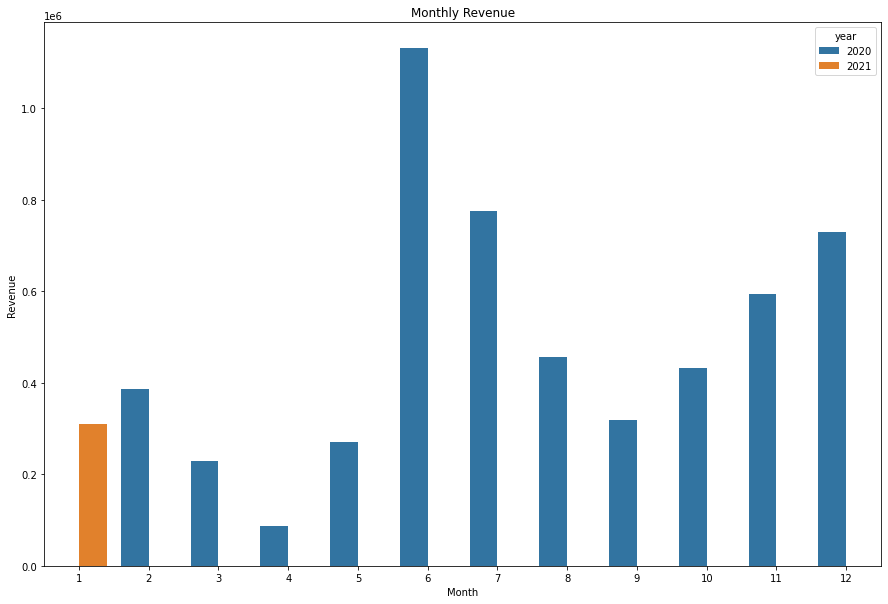

In [12]:
df_revenue = df.groupby(['month', 'year'])['Gross'].sum().reset_index()

plt.figure(figsize=(15,10))
sns.barplot(x="month", y="Gross", hue="year", data=df_revenue)
plt.title('Monthly Revenue')
plt.xlabel("Month")
plt.ylabel("Revenue")


## Best time of the day for sales

In [13]:
df['Count'] = 1
df.head()

,Created,index,Number,Date,Gross,InvoiceID,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,...,Payments.Amount,Payments.Date,year,month,day,dayOfWeek,weekOfMonth,hour,minute,Count
0,2020-02-07 22:51:30.473,0,20.02.002,2020-02-07T00:00:00,200.0,a4f938d7-a234-49f9-9588-ea6dc1b547b2,0.0,200.0,0.0,0.0,...,200.0,2020-02-07T00:00:00,2020,2,7,4,6,22,51,1
1,2020-02-07 22:52:50.140,1,20.02.003,2020-02-07T00:00:00,400.0,89681b1f-21ab-4f0a-8780-3971de3f82b0,0.0,400.0,0.0,0.0,...,400.0,2020-02-07T00:00:00,2020,2,7,4,6,22,52,1
2,2020-02-07 22:53:26.450,2,20.02.004,2020-02-07T00:00:00,100.0,af594745-e964-4051-ae17-93b23b746743,0.0,100.0,0.0,0.0,...,100.0,2020-02-07T00:00:00,2020,2,7,4,6,22,53,1
3,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07T00:00:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,80.0,0.0,0.0,...,380.0,2020-02-07T00:00:00,2020,2,7,4,6,23,5,1
4,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07T00:00:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,300.0,0.0,0.0,...,380.0,2020-02-07T00:00:00,2020,2,7,4,6,23,5,1


In [14]:
df.groupby(['hour']).count()['Count']

hour
0      356
1        6
13       5
14     121
15     574
16    1020
17    1412
18    1553
19    1478
20    1524
21    1894
22    1875
23    1675
Name: Count, dtype: int64

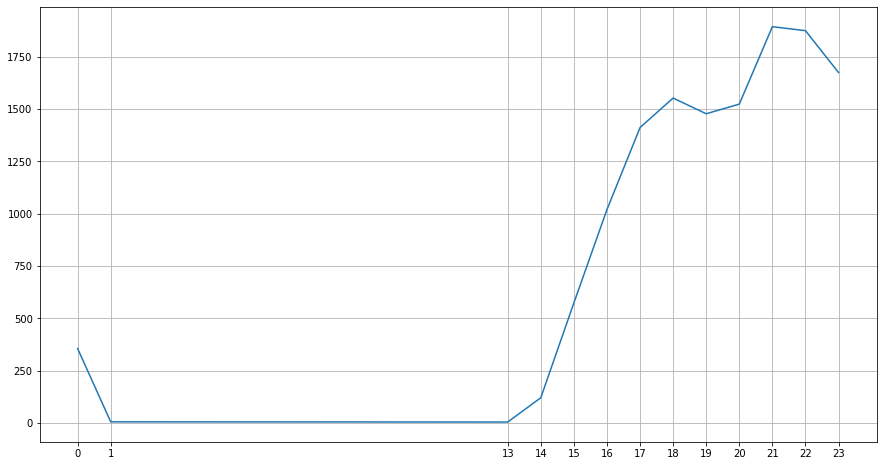

In [15]:
keys = [pair for pair, df in df.groupby(['hour'])]
plt.figure(figsize=(15,8))
plt.plot(keys, df.groupby(['hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

## Best-selling items

In [16]:
product_group = df.groupby('Variants.Name')
product_group.sum()

,index,Gross,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,Variants.PriceOriginal,Variants.Price,Variants.Cost,Variants.Quantity,Payments.Amount,year,month,day,dayOfWeek,weekOfMonth,hour,minute,Count
Variants.Name,,,,,,,,,,,,,,,,,,,
32 inch Synix Digital,317,13000.0,0.0,13000.0,0.0,0.0,13800.0,13000.0,10800.0,1.0,13000.0,2020,11,7,5,45,21,15,1
32 inch Synix SMART,937,16700.0,0.0,16700.0,0.0,0.0,16700.0,16700.0,13700.0,1.0,14700.0,2020,6,13,5,24,16,44,1
79519 Black Official Shoes LIAO,6087,9639.0,0.0,7941.0,0.0,0.0,2300.0,6941.0,6300.0,8.0,9639.0,14140,32,92,23,126,110,214,7
963 LIAO shoes Official Men shoes,7748,7149.0,0.0,6699.0,0.0,0.0,7140.0,6699.0,6300.0,7.0,7149.0,14140,50,105,21,207,129,133,7
AMAYA truael Charger,486,250.0,0.0,150.0,0.0,0.0,200.0,150.0,100.0,1.0,250.0,2020,6,3,2,23,20,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"school shoes n.5,6,7 950",1952,950.0,0.0,950.0,0.0,0.0,950.0,950.0,760.0,1.0,950.0,2020,10,7,2,41,15,8,1
skinny jeans,31686,21430.0,0.0,16470.0,0.0,0.0,13650.0,9650.0,6825.0,64.0,21370.0,78780,421,496,128,1761,729,1358,39
socks,433401,109788.0,18.0,22840.0,0.0,0.0,10590.0,9840.0,4942.0,804.0,108628.0,713067,2717,5079,853,11329,6675,10256,353


In [17]:
quantity_sold = product_group.sum().sort_values(by='Variants.Quantity', ascending=False)[['Variants.Quantity', 'Variants.NettPrice']]
quantity_sold

,Variants.Quantity,Variants.NettPrice
Variants.Name,,
Fagia,1258.0,24880.0
socks,804.0,22840.0
Chiffon Tops Long Sleeve,655.0,46151.0
Stockings,570.0,16200.0
Newborns,481.0,27990.0
...,...,...
LED HD tv,1.0,3000.0
Kids Bike FMK,1.0,2200.0
Synix Smart TV 43 inch,1.0,26000.0


In [18]:
quantity_sold['Avg.Item.Price'] = quantity_sold['Variants.NettPrice'] / quantity_sold['Variants.Quantity']
quantity_sold['Avg.Item.Price'] = quantity_sold['Avg.Item.Price'].round()
quantity_sold

,Variants.Quantity,Variants.NettPrice,Avg.Item.Price
Variants.Name,,,
Fagia,1258.0,24880.0,20.0
socks,804.0,22840.0,28.0
Chiffon Tops Long Sleeve,655.0,46151.0,70.0
Stockings,570.0,16200.0,28.0
Newborns,481.0,27990.0,58.0
...,...,...,...
LED HD tv,1.0,3000.0,3000.0
Kids Bike FMK,1.0,2200.0,2200.0
Synix Smart TV 43 inch,1.0,26000.0,26000.0


<function matplotlib.pyplot.show(close=None, block=None)>

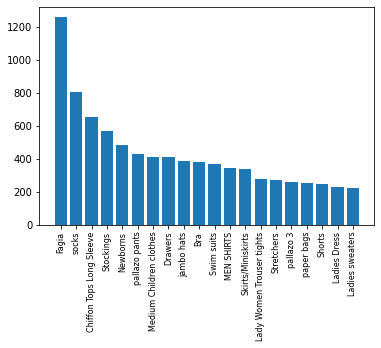

In [19]:
products = [product for product, df in product_group]
top_products = quantity_sold.index[:20]
top_quantity = quantity_sold.iloc[:20]['Variants.Quantity']
plt.bar(top_products, top_quantity)
plt.xticks(top_products, rotation='vertical', size=8)
plt.show

In [20]:
prices = df.groupby('Variants.Name').mean()['Variants.NettPrice'].iloc[0:20]
prices

Variants.Name
32 inch Synix Digital                13000.000000
32 inch Synix SMART                  16700.000000
79519 Black Official Shoes LIAO       1134.428571
963 LIAO shoes Official Men shoes      957.000000
AMAYA truael Charger                   150.000000
Adult Hoodies Jumper                   153.600000
Air Fornce                             430.000000
Amaya USB Data Cable                   133.333333
Army Platdon Metal Model              1600.000000
Baby Carrier                          1000.000000
Baby Fleece Blankets                   650.000000
Baby Jacket Lisa                       162.500000
Baby Shawl Heavy                       800.000000
Baby Shawl Heavy NN 1000               810.000000
Baby Shawl Light                       350.000000
Baby Sheets 200                        375.000000
Baby Skipping Rope                      50.000000
Baby Socks                             137.500000
Baby Toy Jigglers Advanced              38.333333
Baby Toy Jigglers(guitar,insect)    

This is a list of the top 20 most sold items at the store

<ipython-input-21-f9e4a28ec98f>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top_products, rotation='vertical', size=8)
<ipython-input-21-f9e4a28ec98f>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


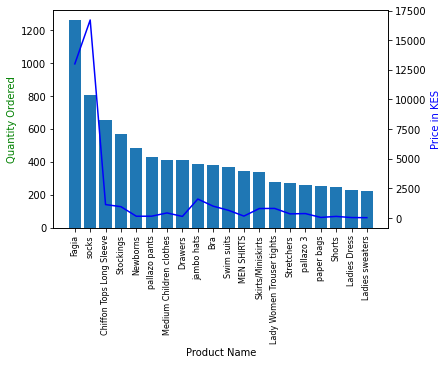

In [21]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(top_products, top_quantity)
ax2.plot(top_products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price in KES', color='b')
ax1.set_xticklabels(top_products, rotation='vertical', size=8)

fig.show()

## What items are sold together?

In [22]:
df_dup = df[df['Number'].duplicated(keep=False)]
df_dup.head()

,Created,index,Number,Date,Gross,InvoiceID,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,...,Payments.Amount,Payments.Date,year,month,day,dayOfWeek,weekOfMonth,hour,minute,Count
3,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07T00:00:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,80.0,0.0,0.0,...,380.0,2020-02-07T00:00:00,2020,2,7,4,6,23,5,1
4,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07T00:00:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,300.0,0.0,0.0,...,380.0,2020-02-07T00:00:00,2020,2,7,4,6,23,5,1
6,2020-02-07 23:44:10.947,5,20.02.007,2020-02-07T00:00:00,300.0,221f4b98-a733-477d-900c-82ea73a0d45e,0.0,100.0,0.0,0.0,...,300.0,2020-02-07T00:00:00,2020,2,7,4,6,23,44,1
7,2020-02-07 23:44:10.947,5,20.02.007,2020-02-07T00:00:00,300.0,221f4b98-a733-477d-900c-82ea73a0d45e,0.0,200.0,0.0,0.0,...,300.0,2020-02-07T00:00:00,2020,2,7,4,6,23,44,1
9,2020-02-08 00:05:05.727,7,20.02.009,2020-02-07T00:00:00,200.0,e0421c3e-7a48-4db1-80ee-d4f848e9839b,0.0,100.0,0.0,0.0,...,200.0,2020-02-07T00:00:00,2020,2,8,5,6,0,5,1


In [23]:
df_dup['Items.Grouped'] = df_dup.groupby('Number')['Variants.Name'].transform(lambda x: ', '.join(x))
df_dup.head()

<ipython-input-23-282658f01a70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['Items.Grouped'] = df_dup.groupby('Number')['Variants.Name'].transform(lambda x: ', '.join(x))


,Created,index,Number,Date,Gross,InvoiceID,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,...,Payments.Date,year,month,day,dayOfWeek,weekOfMonth,hour,minute,Count,Items.Grouped
3,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07T00:00:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,80.0,0.0,0.0,...,2020-02-07T00:00:00,2020,2,7,4,6,23,5,1,"Children Jackets 80bob 3003, Lady Hand bag"
4,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07T00:00:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,300.0,0.0,0.0,...,2020-02-07T00:00:00,2020,2,7,4,6,23,5,1,"Children Jackets 80bob 3003, Lady Hand bag"
6,2020-02-07 23:44:10.947,5,20.02.007,2020-02-07T00:00:00,300.0,221f4b98-a733-477d-900c-82ea73a0d45e,0.0,100.0,0.0,0.0,...,2020-02-07T00:00:00,2020,2,7,4,6,23,44,1,"Blazers DKJ 230 7, Jackets 200"
7,2020-02-07 23:44:10.947,5,20.02.007,2020-02-07T00:00:00,300.0,221f4b98-a733-477d-900c-82ea73a0d45e,0.0,200.0,0.0,0.0,...,2020-02-07T00:00:00,2020,2,7,4,6,23,44,1,"Blazers DKJ 230 7, Jackets 200"
9,2020-02-08 00:05:05.727,7,20.02.009,2020-02-07T00:00:00,200.0,e0421c3e-7a48-4db1-80ee-d4f848e9839b,0.0,100.0,0.0,0.0,...,2020-02-07T00:00:00,2020,2,8,5,6,0,5,1,"Men tshirts, Chiffon Tops Long Sleeve"


In [24]:
df_dup = df_dup[['Number', 'Items.Grouped']].drop_duplicates()
df_dup.head()

,Number,Items.Grouped
3,20.02.005,"Children Jackets 80bob 3003, Lady Hand bag"
6,20.02.007,"Blazers DKJ 230 7, Jackets 200"
9,20.02.009,"Men tshirts, Chiffon Tops Long Sleeve"
13,20.02.012,"MEN SHIRTS, Track Tops"
21,20.02.018,"Household, Tshirt, Jackets 200"


In [25]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_dup['Items.Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

grp_count = count.most_common(10)

This is a list of the most popular combination of items sold at the store

In [26]:
df_grp = pd.DataFrame(grp_count)
df_grp.columns = ['combination', 'count']
df_grp

,combination,count
0,"(pallazo pants, Bra)",10
1,"(Fagia, paper bags)",10
2,"(Skirts/Miniskirts, Chiffon Tops Long Sleeve)",9
3,"(socks, Drawers)",9
4,"( Pullnecks, pallazo pants)",8
5,"(Stretchers, Ladies sweaters)",8
6,"(pallazo shorts, pallazo 3)",8
7,"(Lady Women Trouser tights, Chiffon Tops Long...",7
8,"(pallazo pants, Ladies Dress)",7
9,"( Chiffon Tops Long Sleeve, Skirts/Miniskirts)",7


## Monthly items sold overview

Text(0, 0.5, 'Quantity')

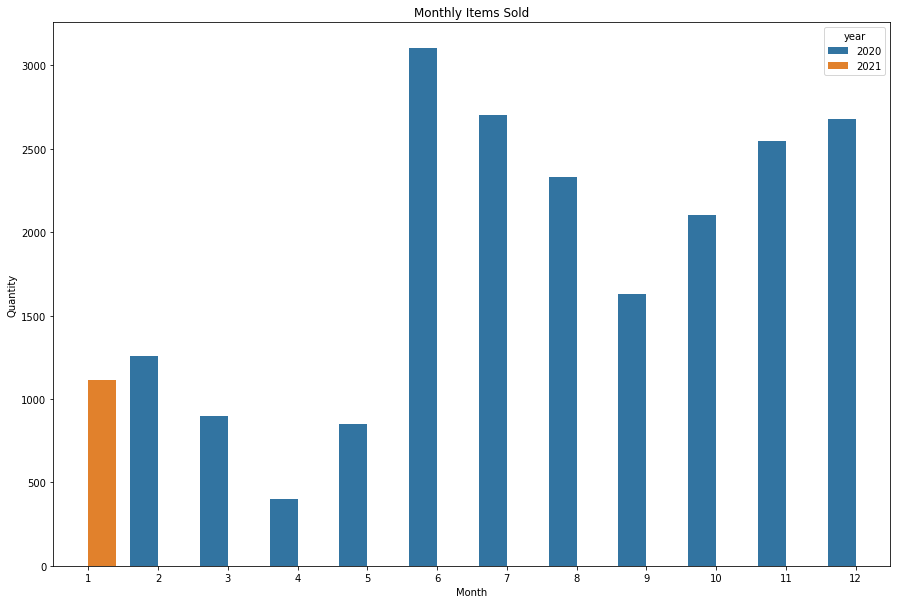

In [27]:
df_quantity = df.groupby(['month', 'year'])['Variants.Quantity'].sum().reset_index()

plt.figure(figsize=(15,10))
sns.barplot(x="month", y="Variants.Quantity", hue="year", data=df_quantity)
plt.title('Monthly Items Sold')
plt.xlabel("Month")
plt.ylabel("Quantity")

## Average Monthly Revenue

Text(0, 0.5, 'Revenue')

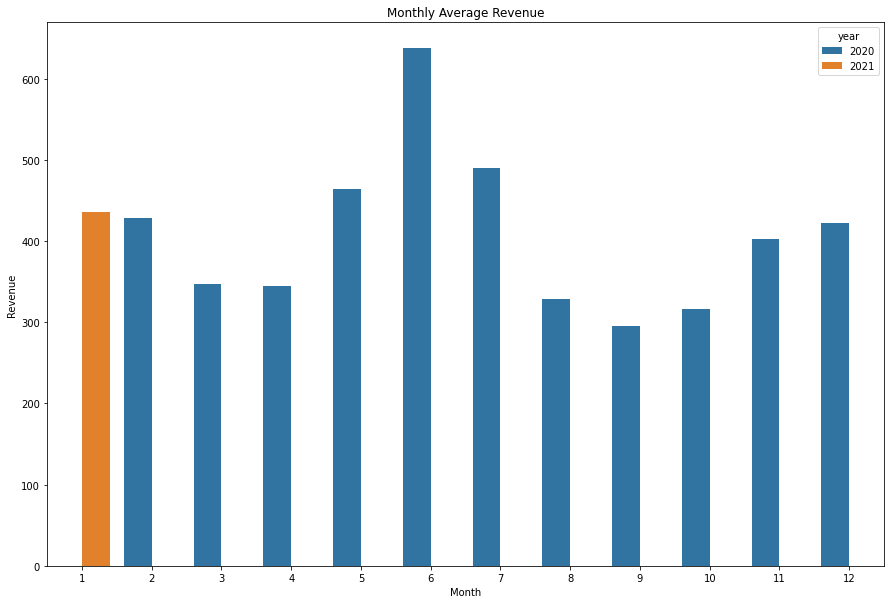

In [28]:
df_revenue_avg = df.groupby(['month', 'year'])['Gross'].mean().reset_index()

plt.figure(figsize=(15,10))
sns.barplot(x="month", y="Gross", hue="year", data=df_revenue_avg)
plt.title('Monthly Average Revenue')
plt.xlabel("Month")
plt.ylabel("Revenue")

## Frequently sold items

This is a calculation of the frequency of purchased items at the store.

In [29]:
df_last_purchased = df.groupby(['Variants.Name'])['Created'].max().reset_index()
df_last_purchased.columns = ["Product", "LastPurchaseDate"]
df_last_purchased['Recency'] = (df_last_purchased["LastPurchaseDate"].max() - df_last_purchased['LastPurchaseDate']).dt.days
df_last_purchased = df_last_purchased.sort_values(by=["Recency"], ascending=True)
df_last_purchased

,Product,LastPurchaseDate,Recency
68,Cotton Tops,2021-01-25 22:22:41.243,0
230,Velvet 4,2021-01-26 00:04:36.673,0
66,Cotton Dress 6,2021-01-25 21:16:53.330,0
218,Towel set Medium,2021-01-25 21:16:53.330,0
99,Fagia,2021-01-25 15:38:05.753,0
...,...,...,...
196,Skirt Suit,2020-02-15 23:25:51.777,345
114,"Hankerchief, caps, feeders etc",2020-02-15 17:41:07.320,345
236,children jackets 300 bob AK,2020-02-14 17:48:34.510,346
22,Baby Walker-FMK(Pink),2020-02-13 23:58:33.703,347


In [30]:
df_hourly = df.resample('H', on='Created').agg({'Gross': 'sum', 'Variants.Quantity': 'sum', 'Variants.Name': 'nunique'})

In [31]:
hourly_sales = df.groupby([pd.Grouper(key='Created', freq='H'), 'Variants.Name']).agg(
                                                                       total_quantity=('Variants.Quantity', 'sum'),
                                                                       total_amount=('Variants.NettPrice', 'sum'))
hourly_sales

total_quantity  total_amount
Created             Variants.Name                                         
2020-02-07 22:00:00 Ladies Dress 200bob 2001             1.0         200.0
                    Men Trousers                         2.0         400.0
                    Men tshirts                          1.0         100.0
2020-02-07 23:00:00 Adult Hoodies Jumper                 1.0         200.0
                    Blazers DKJ 230 7                    2.0         100.0
...                                                      ...           ...
2021-01-25 22:00:00 Cotton Tops                          1.0          50.0
                    Velvet 4                             1.0          80.0
                    pallazo pants 5                      1.0         100.0
2021-01-26 00:00:00 Velvet 4                             1.0          80.0
                    pallazo pants 5                      1.0         110.0

[11424 rows x 2 columns]

In [32]:
daily_sales = df.groupby([pd.Grouper(key='Created', freq='d'), 'Variants.Name']).agg(
                                                                       total_quantity=('Variants.Quantity', 'sum'),
                                                                       total_amount=('Variants.NettPrice', 'sum'))
daily_sales

total_quantity  total_amount
Created    Variants.Name                                            
2020-02-07 Adult Hoodies Jumper                    1.0         200.0
           Blazers DKJ 230 7                       2.0         100.0
           Children Jackets 80bob 3003             1.0          80.0
           Household                               2.0         400.0
           Jackets 200                             1.0         200.0
...                                                ...           ...
2021-01-25 pallazo pants 5                         3.0         320.0
           paper bags                              2.0          20.0
           socks                                   3.0          60.0
2021-01-26 Velvet 4                                1.0          80.0
           pallazo pants 5                         1.0         110.0

[6479 rows x 2 columns]

In [33]:
weekly_sales = df.groupby([pd.Grouper(key='Created', freq='W'), 'Variants.Name']).agg(
                                                                       total_quantity=('Variants.Quantity', 'sum'),
                                                                       total_amount=('Variants.NettPrice', 'sum'))

weekly_sales

total_quantity  total_amount
Created    Variants.Name                                            
2020-02-09 Adult Hoodies Jumper                    9.0        1795.0
           Blazers DKJ 230 7                       3.0         300.0
           Chiffon Tops Long Sleeve                1.0         100.0
           Children Jackets 80bob 3003             3.0         240.0
           Children School bag                     1.0         250.0
...                                                ...           ...
2021-01-31 Towel set Small                         2.0         120.0
           Velvet 4                                2.0         160.0
           pallazo pants 5                         4.0         430.0
           paper bags                              2.0          20.0
           socks                                   3.0          60.0

[2219 rows x 2 columns]

In [34]:
# Frequency of items bought in terms of days
df_daily = df.groupby(['Variants.Name'])['day'].count().reset_index()
df_daily.columns = ["Product", "Frequency"]
df_daily

,Product,Frequency
0,32 inch Synix Digital,1
1,32 inch Synix SMART,1
2,79519 Black Official Shoes LIAO,7
3,963 LIAO shoes Official Men shoes,7
4,AMAYA truael Charger,1
...,...,...
255,"school shoes n.5,6,7 950",1
256,skinny jeans,39
257,socks,353
258,vans,34


In [35]:
df_last_purchased = pd.merge(df_last_purchased, df_daily, how="inner", on=["Product"])
df_last_purchased

,Product,LastPurchaseDate,Recency,Frequency
0,Cotton Tops,2021-01-25 22:22:41.243,0,136
1,Velvet 4,2021-01-26 00:04:36.673,0,94
2,Cotton Dress 6,2021-01-25 21:16:53.330,0,54
3,Towel set Medium,2021-01-25 21:16:53.330,0,26
4,Fagia,2021-01-25 15:38:05.753,0,508
...,...,...,...,...
255,Skirt Suit,2020-02-15 23:25:51.777,345,7
256,"Hankerchief, caps, feeders etc",2020-02-15 17:41:07.320,345,1
257,children jackets 300 bob AK,2020-02-14 17:48:34.510,346,1
258,Baby Walker-FMK(Pink),2020-02-13 23:58:33.703,347,1


In [36]:
df_last_purchased['LastPurchaseDate'] = pd.to_datetime(df_last_purchased['LastPurchaseDate'])
df_last_purchased = df_last_purchased.set_index('LastPurchaseDate')

df_last_purchased['LastPurYear'] = df_last_purchased.index.year
df_last_purchased['LastPurMonth'] = df_last_purchased.index.month
df_last_purchased['LastPurDay'] = df_last_purchased.index.day
df_last_purchased['weekDayOfLastPur'] = df_last_purchased.index.weekday
df_last_purchased['yearWeekOfLastPur'] = df_last_purchased.index.week
df_last_purchased['LastPurHour'] = df_last_purchased.index.hour
df_last_purchased['LastPurMinute'] = df_last_purchased.index.minute
df_last_purchased.head()

<ipython-input-36-61d8a001e146>:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df_last_purchased['yearWeekOfLastPur'] = df_last_purchased.index.week


,Product,Recency,Frequency,LastPurYear,LastPurMonth,LastPurDay,weekDayOfLastPur,yearWeekOfLastPur,LastPurHour,LastPurMinute
LastPurchaseDate,,,,,,,,,,
2021-01-25 22:22:41.243,Cotton Tops,0,136,2021,1,25,0,4,22,22
2021-01-26 00:04:36.673,Velvet 4,0,94,2021,1,26,1,4,0,4
2021-01-25 21:16:53.330,Cotton Dress 6,0,54,2021,1,25,0,4,21,16
2021-01-25 21:16:53.330,Towel set Medium,0,26,2021,1,25,0,4,21,16
2021-01-25 15:38:05.753,Fagia,0,508,2021,1,25,0,4,15,38


In [37]:
df_last_purchased = df_last_purchased.reset_index()
df_last_purchased.rename(columns={"Product": "Variants.Name"}, inplace=True)
df_last_purchased

,LastPurchaseDate,Variants.Name,Recency,Frequency,LastPurYear,LastPurMonth,LastPurDay,weekDayOfLastPur,yearWeekOfLastPur,LastPurHour,LastPurMinute
0,2021-01-25 22:22:41.243,Cotton Tops,0,136,2021,1,25,0,4,22,22
1,2021-01-26 00:04:36.673,Velvet 4,0,94,2021,1,26,1,4,0,4
2,2021-01-25 21:16:53.330,Cotton Dress 6,0,54,2021,1,25,0,4,21,16
3,2021-01-25 21:16:53.330,Towel set Medium,0,26,2021,1,25,0,4,21,16
4,2021-01-25 15:38:05.753,Fagia,0,508,2021,1,25,0,4,15,38
...,...,...,...,...,...,...,...,...,...,...,...
255,2020-02-15 23:25:51.777,Skirt Suit,345,7,2020,2,15,5,7,23,25
256,2020-02-15 17:41:07.320,"Hankerchief, caps, feeders etc",345,1,2020,2,15,5,7,17,41
257,2020-02-14 17:48:34.510,children jackets 300 bob AK,346,1,2020,2,14,4,7,17,48
258,2020-02-13 23:58:33.703,Baby Walker-FMK(Pink),347,1,2020,2,13,3,7,23,58


In [38]:
df = pd.merge(df, df_last_purchased, how="inner", on=["Variants.Name"])
df.sort_values(by=["Number"], inplace=True)
df.head()

,Created,index,Number,Date,Gross,InvoiceID,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,...,LastPurchaseDate,Recency,Frequency,LastPurYear,LastPurMonth,LastPurDay,weekDayOfLastPur,yearWeekOfLastPur,LastPurHour,LastPurMinute
0,2020-02-07 22:51:30.473,0,20.02.002,2020-02-07T00:00:00,200.0,a4f938d7-a234-49f9-9588-ea6dc1b547b2,0.0,200.0,0.0,0.0,...,2020-05-30 18:36:43.857,240,87,2020,5,30,5,22,18,36
87,2020-02-07 22:52:50.140,1,20.02.003,2020-02-07T00:00:00,400.0,89681b1f-21ab-4f0a-8780-3971de3f82b0,0.0,400.0,0.0,0.0,...,2020-11-02 21:13:17.210,84,14,2020,11,2,0,45,21,13
101,2020-02-07 22:53:26.450,2,20.02.004,2020-02-07T00:00:00,100.0,af594745-e964-4051-ae17-93b23b746743,0.0,100.0,0.0,0.0,...,2020-09-20 20:37:31.790,127,130,2020,9,20,6,38,20,37
242,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07T00:00:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,300.0,0.0,0.0,...,2020-11-10 20:26:25.740,76,56,2020,11,10,1,46,20,26
231,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07T00:00:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,80.0,0.0,0.0,...,2020-02-17 18:14:30.623,343,11,2020,2,17,0,8,18,14


/Users/erickamau/PycharmProjects/ADS/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Item sale count')

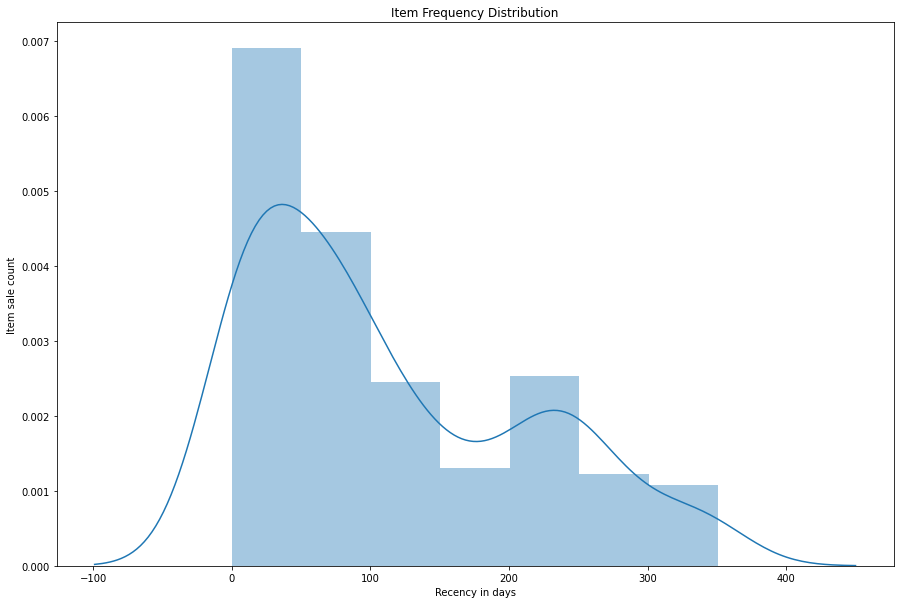

In [39]:
plt.figure(figsize=(15,10))
sns.distplot(df_last_purchased['Recency'])
plt.title("Item Frequency Distribution")
plt.xlabel("Recency in days")
plt.ylabel("Item sale count")

In [40]:
# finding the interval between item purchases in minutes

df['ItemTimeDiff'] = df.loc[:,'Created'].diff().dt.total_seconds()
df['ItemTimeDiff']

0             NaN
87         79.667
101        36.310
242       695.650
231         0.000
           ...   
5204     2266.426
13132       0.000
13276     669.430
13133    5446.000
13277       0.000
Name: ItemTimeDiff, Length: 13493, dtype: float64

In [41]:
# finding the time interval between sale of a particular product in minutes. Please note that the interval is in minutes

df['ProductTimeDiff'] = df.groupby(by="Variants.Name")['Created'].diff().dt.total_seconds()
df['ProductTimeDiff']

0               NaN
87              NaN
101             NaN
242             NaN
231             NaN
            ...    
5204     170967.143
13132    167334.346
13276     13708.520
13133      6115.430
13277      5446.000
Name: ProductTimeDiff, Length: 13493, dtype: float64

In [42]:
'''Calculating profit/loss, margins and deviations from desired margin of 1'''

df['GrossMargin'] = df['Variants.Price'] - df['Variants.Cost']
df['ProfitLoss'] = np.where(df.GrossMargin<0, "Loss", "Profit")
df['MarginPerc'] = df.GrossMargin / df["Variants.Cost"]
df.replace([np.inf, -np.inf], 1, inplace=True)
df['MarginDeviation'] = 1 - df.MarginPerc
df['DeviationType'] = np.where(df.MarginDeviation<0, "Positive", "Negative")
df.head()

,Created,index,Number,Date,Gross,InvoiceID,PointsEarned,Variants.NettPrice,Variants.DiscountAmount,Variants.Discount,...,yearWeekOfLastPur,LastPurHour,LastPurMinute,ItemTimeDiff,ProductTimeDiff,GrossMargin,ProfitLoss,MarginPerc,MarginDeviation,DeviationType
0,2020-02-07 22:51:30.473,0,20.02.002,2020-02-07T00:00:00,200.0,a4f938d7-a234-49f9-9588-ea6dc1b547b2,0.0,200.0,0.0,0.0,...,22,18,36,NaN,NaN,200.0,Profit,1.000000,0.000000,Negative
87,2020-02-07 22:52:50.140,1,20.02.003,2020-02-07T00:00:00,400.0,89681b1f-21ab-4f0a-8780-3971de3f82b0,0.0,400.0,0.0,0.0,...,45,21,13,79.667,NaN,80.0,Profit,0.666667,0.333333,Negative
101,2020-02-07 22:53:26.450,2,20.02.004,2020-02-07T00:00:00,100.0,af594745-e964-4051-ae17-93b23b746743,0.0,100.0,0.0,0.0,...,38,20,37,36.310,NaN,25.0,Profit,0.333333,0.666667,Negative
242,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07T00:00:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,300.0,0.0,0.0,...,46,20,26,695.650,NaN,117.0,Profit,0.639344,0.360656,Negative
231,2020-02-07 23:05:02.100,3,20.02.005,2020-02-07T00:00:00,380.0,a76090aa-9470-4ef5-8e38-59568d23bdae,0.0,80.0,0.0,0.0,...,8,18,14,0.000,NaN,80.0,Profit,1.000000,0.000000,Negative


In [43]:
# create SQL table and insert pre-processed data. To be used in a different analysis

engine = create_engine(conn_str, echo=True)

try:
    df.to_sql('eda', con=engine, if_exists='replace', index=False)
except exc.IntegrityError:
    pass
e = engine.execute("SELECT * FROM pre_process").fetchall()
print(e)

2021-03-02 11:31:00,545 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-03-02 11:31:00,545 INFO sqlalchemy.engine.base.Engine ()
2021-03-02 11:31:00,547 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-03-02 11:31:00,549 INFO sqlalchemy.engine.base.Engine ()
2021-03-02 11:31:00,552 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("eda")
2021-03-02 11:31:00,553 INFO sqlalchemy.engine.base.Engine ()
2021-03-02 11:31:00,557 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("eda")
2021-03-02 11:31:00,558 INFO sqlalchemy.engine.base.Engine ()
2021-03-02 11:31:00,561 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-03-02 11:31:00,561 INFO sqlalchemy.engine.base.Engine ()
2021-03-02 11:31:00,563 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("eda")
2021-03-02 11:31:00,564 INFO sqlalchemy.engine.base.Engine ()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

